# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()
df.describe()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


target
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
print("Valores nulos por columna:\n", df.isnull().sum())
print("Filas duplicadas:", df.duplicated().sum())

Valores nulos por columna:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Filas duplicadas: 1


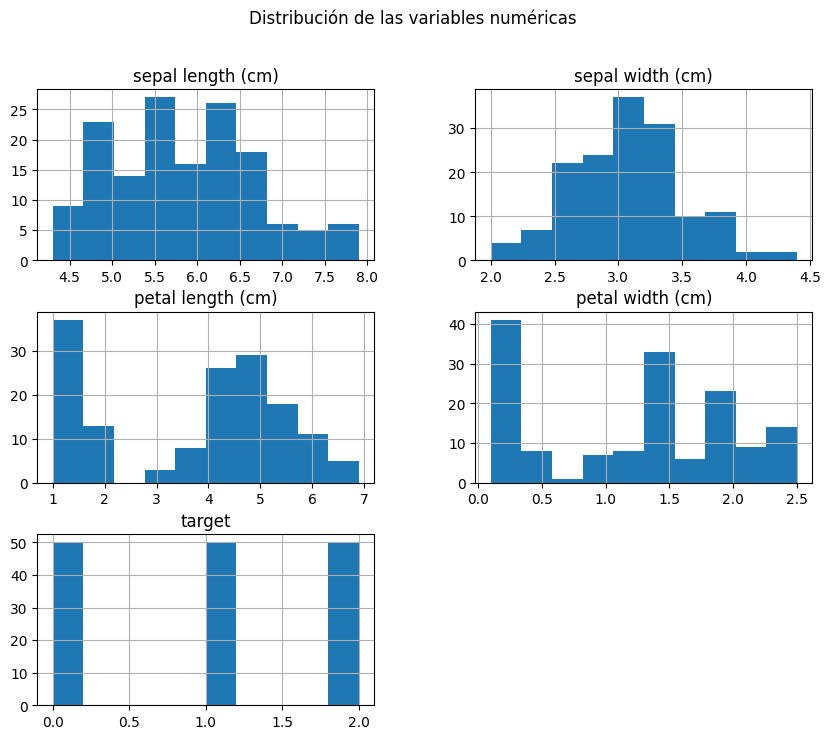

In [5]:
df.hist(figsize=(10,8))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

El análisis de los histogramas permite observar cómo se distribuyen las variables del dataset:

Sepal length (cm): presenta una distribución aproximadamente normal, con una ligera inclinación hacia la derecha. Los valores se concentran entre 5 y 7 cm.

Sepal width (cm): muestra una distribución asimétrica, con mayor concentración de datos en torno a los 3 cm. Se observan algunos valores extremos por debajo de 2.5 y por encima de 4 cm.

Petal length (cm): tiene una distribución claramente bimodal o incluso trimodal, lo que indica que puede haber varias subpoblaciones en los datos. Esto es coherente con la existencia de tres especies distintas.

Petal width (cm): también presenta una distribución multimodal, reflejando la influencia de diferentes clases en la variable. La dispersión es significativa.

Target: se observa una distribución perfectamente balanceada entre las tres clases (0, 1 y 2), lo cual es ideal para un problema de clasificación.

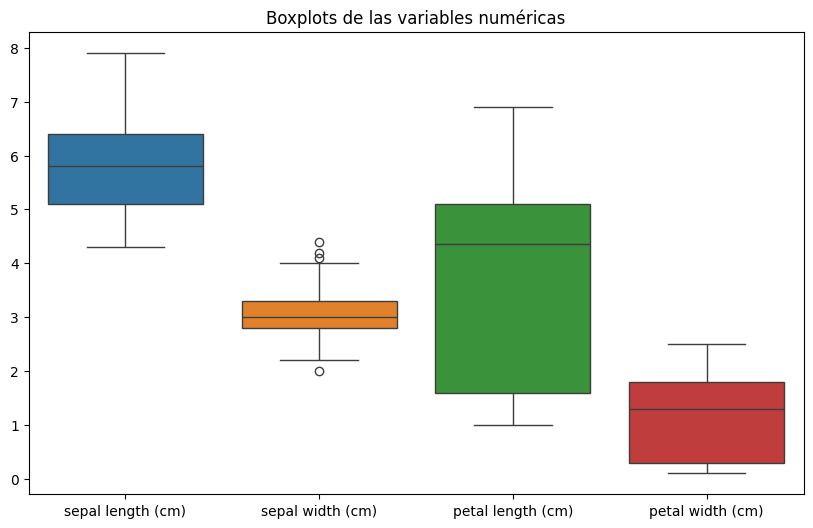

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop('target', axis=1))
plt.title('Boxplots de las variables numéricas')
plt.show()

Los boxplots permiten visualizar la dispersión de los datos y detectar posibles valores atípicos:

Sepal length (cm): tiene una distribución bastante simétrica y sin presencia de valores atípicos significativos. La mediana se sitúa cerca de los 6 cm.

Sepal width (cm): se identifican varios outliers, especialmente hacia los valores bajos (alrededor de 2 cm) y algunos por encima de 4 cm. Aunque no extremos, indican variabilidad relevante en esta variable.

Petal length (cm): muestra una gran dispersión y no se evidencian outliers. Es una variable con fuerte capacidad discriminativa.

Petal width (cm): también tiene gran variabilidad, con algunos valores cercanos a cero. Aunque visualmente no hay outliers extremos, sí se distingue un rango amplio de valores.

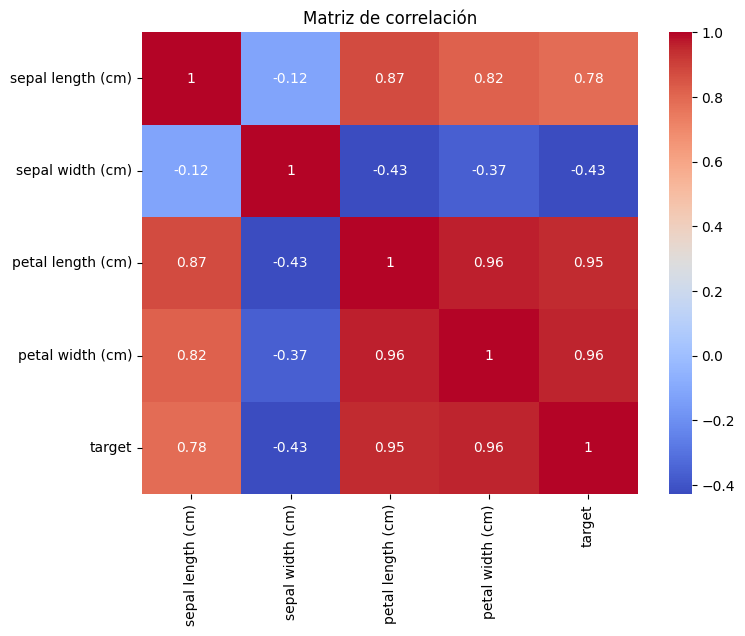

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

La matriz de correlación permite evaluar la relación lineal entre las variables numéricas:

Petal length y petal width: están altamente correlacionadas entre sí (coeficiente de 0.96), lo que sugiere una fuerte relación lineal entre ambas.

Target y petal width / petal length: muestran correlaciones muy altas (0.96 y 0.95 respectivamente), indicando que estas variables son las más predictivas para determinar la clase de flor.

Sepal length: también tiene una buena correlación con el target (0.78), aunque en menor grado que las variables del pétalo.

Sepal width: destaca por tener correlaciones negativas o bajas con el resto de variables, incluyendo el target. Esto sugiere que aporta información distinta, aunque posiblemente menos relevante para la clasificación.

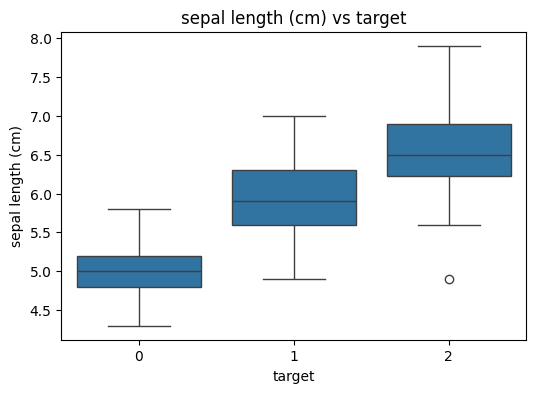

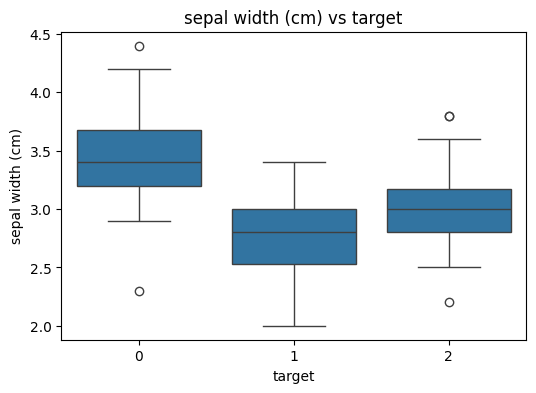

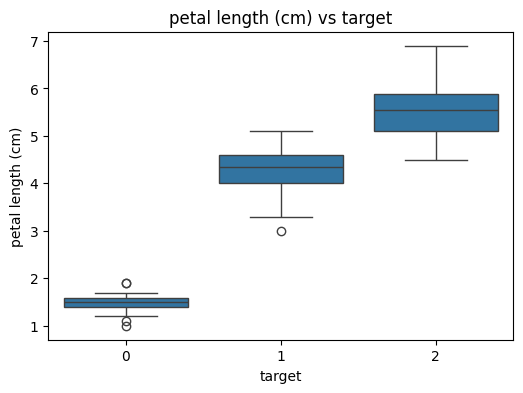

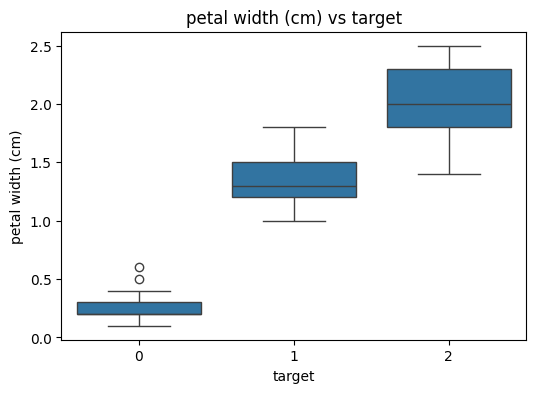

In [8]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs target')
    plt.show()

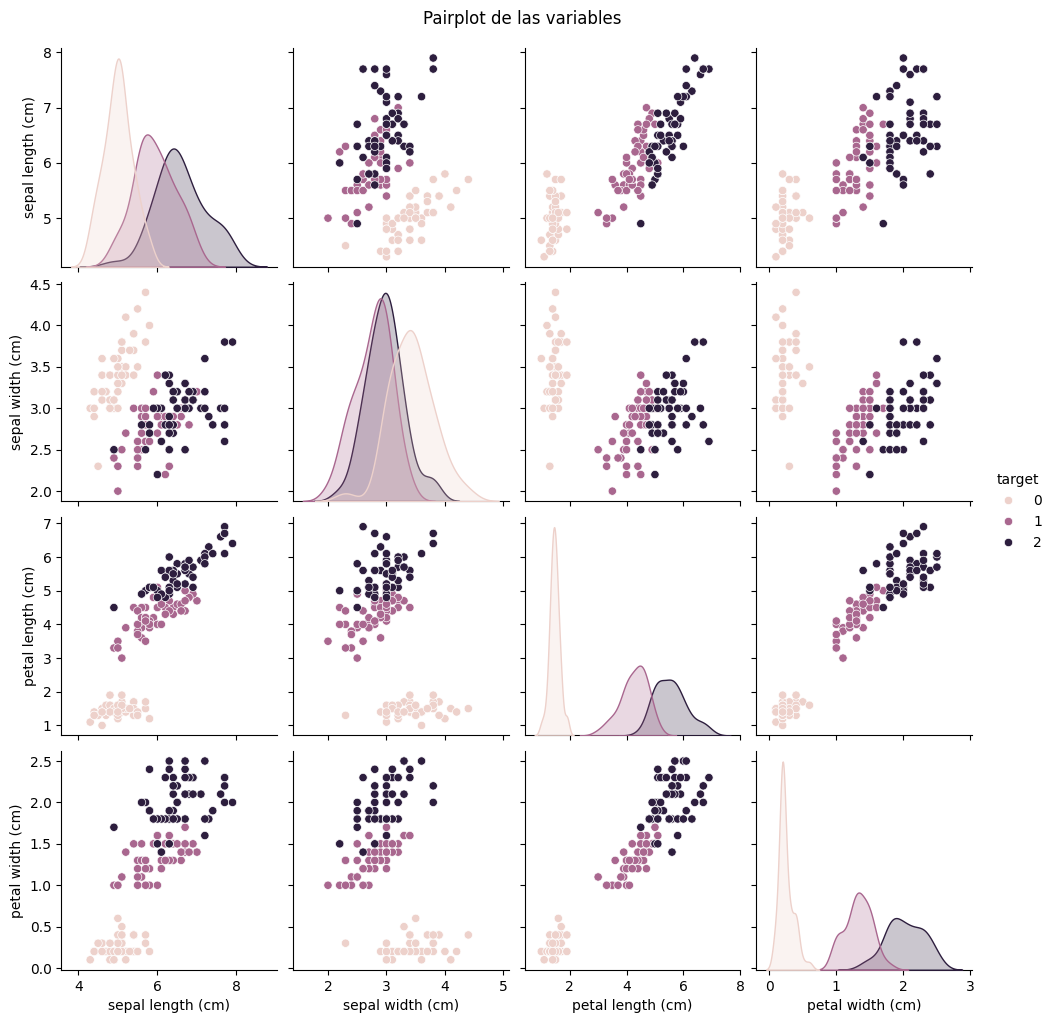

In [9]:
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot de las variables', y=1.02)
plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
import joblib

joblib.dump(clf, '../models/iris_model.pkl')
print("¡Modelo guardado en ../models/iris_model.pkl!")

¡Modelo guardado en ../models/iris_model.pkl!
